In [2]:
import json
import pandas as pd

studentsList = []
blueteamId = 0
# print("Started Reading JSON file which contains multiple JSON document")
with open('match_data.json') as f:
    for jsonObj in f:
        studentDict = json.loads(jsonObj)
        studentsList.append(studentDict)
data = []
[studentsList] = studentsList   # remove-the-outer-list-of-a-double-list [[]] -> []
for student in studentsList:
    mydict = {}
    BlueTeam_assists = 0
    RedTeam_assists = 0
    BlueTeam_goldEarned = 0
    RedTeam_goldEarned = 0
    BlueTeam_championLevel = 0 
    RedTeam_championLevel = 0
    gameId = student['info']['gameId']
    for participant in student['info']['participants']:
        if participant['summonerName']=='Timoschka17':
            # get teamId since we need to know the team that Timoschka belongs to and based on that Timoschka's team is gonna be the Blue Team
            blueteamId = participant['teamId']
    for participant in student['info']['participants']: # get blue/red team total assists
        if participant["teamId"] == blueteamId & participant["teamId"] != 0:
            # Add the participant's assists to the BlueTeam assists
            BlueTeam_assists += participant['assists']    
        if participant["teamId"] != blueteamId & participant["teamId"] != 0:
            # Add the participant's assists to the RedTeam assists
            RedTeam_assists += participant['assists']
    for participant in student['info']['participants']: # get blue/red team total gold earned
        if participant["teamId"] == blueteamId & participant["teamId"] != 0:
            # Add the participant's total gold to the BlueTeam total gold
            BlueTeam_goldEarned += participant['goldEarned']
            
        if participant["teamId"] != blueteamId & participant["teamId"] != 0:
            # Add the participant's total gold to the RedTeam total gold
            RedTeam_goldEarned += participant['goldEarned']         
    redGoldDiff = RedTeam_goldEarned - BlueTeam_goldEarned
    blueGoldDiff = BlueTeam_goldEarned - RedTeam_goldEarned
    for participant in student['info']['participants']: # get blue/red team Average level
        if participant["teamId"] == blueteamId & participant["teamId"] != 0:
            # Add the participant's Average level to the BlueTeam Average level
            BlueTeam_championLevel += participant['champLevel']
        if participant["teamId"] != blueteamId & participant["teamId"] != 0:
            # Add the participant's Average level to the RedTeam Average level
            RedTeam_championLevel += participant['champLevel']
    BlueTeam_AvgLevel = BlueTeam_championLevel/5
    RedTeam_AvgLevel = RedTeam_championLevel/5
    for team in student['info']['teams']:        
        if team['teamId']==blueteamId:
            # get champkills of the team with the corresponding teamId. if teamId == teamId of Timoschka, then champkills are the Blue team champion kills
            BlueteamKills = team['objectives']['champion']['kills']
            BlueTeamfirstblood = team['objectives']['champion']['first']
            if BlueTeamfirstblood == False: # represent False to be 0 nad True to be 1
                BlueTeamfirstblood = 0
            if BlueTeamfirstblood == True:
                BlueTeamfirstblood = 1
            BlueTeamWin = team['win']   # ersetzen mit '0' anstatt 'false/true' für blueWins
            if BlueTeamWin == False:
                BlueTeamWin = 0
            if BlueTeamWin == True:
                BlueTeamWin = 1
        else:
            RedteamKills = team['objectives']['champion']['kills']
            RedTeamfirstblood = team['objectives']['champion']['first']
            if RedTeamfirstblood == False:
                RedTeamfirstblood = 0
            if RedTeamfirstblood == True:
                RedTeamfirstblood = 1
            RedTeamWin = team['win']
    # Add the key/value of fields of interests to the 'mydict' dict
    mydict['gameId'] = gameId
    mydict['blueWins'] = BlueTeamWin
    mydict['blueFirstBlood'] = BlueTeamfirstblood
    mydict['blueKills'] = BlueteamKills
    mydict['blueAssists'] = BlueTeam_assists
    mydict['blueTotalGold'] = BlueTeam_goldEarned
    mydict['blueAvgLevel'] = BlueTeam_AvgLevel
    mydict['blueGoldDiff'] = blueGoldDiff
    
    mydict['redFirstBlood'] = RedTeamfirstblood
    mydict['redKills'] = RedteamKills
    mydict['redAssists'] = RedTeam_assists
    mydict['redTotalGold'] = RedTeam_goldEarned
    mydict['redAvgLevel'] = RedTeam_AvgLevel    
    mydict['redGoldDiff'] = redGoldDiff
    
    data.append(mydict) # Add the 'mydict' dict to the 'data' list

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(data)
# Print the dataframe
df

,gameId,blueWins,blueFirstBlood,blueKills,blueAssists,blueTotalGold,blueAvgLevel,blueGoldDiff,redFirstBlood,redKills,redAssists,redTotalGold,redAvgLevel,redGoldDiff
0,6217814471,1,1,40,46,66033,15.4,2992,0,39,58,63041,16.2,-2992
1,6217739041,0,1,40,61,62849,15.2,-4139,0,37,62,66988,15.6,4139
2,6217354750,0,0,32,60,66534,16.4,-4991,1,38,59,71525,16.0,4991
3,6217300380,1,1,49,54,81733,17.4,2750,0,56,76,78983,17.8,-2750
4,6217239758,1,1,32,42,59374,15.2,7923,0,24,19,51451,13.6,-7923
5,6216704112,0,0,38,47,76325,17.4,-7576,1,53,72,83901,18.0,7576
6,6216631995,0,0,13,12,40120,12.6,-7883,1,26,33,48003,13.4,7883
7,6216554597,0,0,38,40,64177,15.6,-2664,1,41,59,66841,15.8,2664
8,6215274778,0,0,26,34,58844,14.6,-9067,1,34,40,67911,16.4,9067
9,6215206105,0,1,23,41,46620,13.2,-12327,0,34,36,58947,14.4,12327


In [20]:
best_features_list = list(df) # Holen einer Liste aller Spaltennamen in Pandas DataFrame
best_features_list

['blueWins',
 'blueFirstBlood',
 'blueKills',
 'blueAssists',
 'blueTotalGold',
 'blueAvgLevel',
 'blueGoldDiff',
 'redFirstBlood',
 'redKills',
 'redAssists',
 'redTotalGold',
 'redAvgLevel',
 'redGoldDiff']

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df.info()

Positive Correlations:
blueGoldDiff      0.856204
blueFirstBlood    0.389819
blueKills         0.347509
blueAssists       0.239839
blueTotalGold     0.185221
Name: blueWins, dtype: float64


Negative Correlations:
redGoldDiff     -0.856204
redFirstBlood   -0.314485
redAssists      -0.273689
redKills        -0.198201
redTotalGold    -0.149116
Name: blueWins, dtype: float64


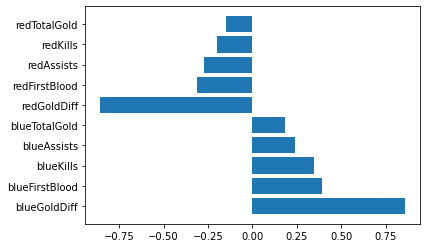

In [28]:
new_df = df[best_features_list]
corr = new_df.corr()
print('Positive Correlations:')
print(corr.loc['blueWins'].sort_values(ascending=False)[1:6])

x = corr.loc['blueWins'].sort_values(ascending=False)[1:6]
x = x[:].tolist()
print('\n')
print('Negative Correlations:')
print(corr.loc['blueWins'].sort_values(ascending=True)[:5])
y = corr.loc['blueWins'].sort_values(ascending=True)[:5]
y = y[:].tolist()
for i in y:
    x.append(i)

x = np.array(x)
y = np.array(['blueGoldDiff','blueFirstBlood','blueKills','blueAssists','blueTotalGold','redGoldDiff',
              'redFirstBlood','redAssists','redKills','redTotalGold'])
plt.barh(y, x)
plt.show()

In [36]:
AnzBlueTeamWins = sum(df['blueWins'] == 1) # Anzahl Siege des blauen Teams
P_blueGoldDiff = sum((df['blueGoldDiff'] > 0) & (df['blueWins'] == 1))  # Positiv blauGoldDiff
Pro_P_Wins = sum((df['blueGoldDiff'] > 0) & (df['blueWins'] == 1))/AnzBlueTeamWins  # Prozentsatz der Spiele, bei denen das blaue Team mit einer positiven Golddifferenz gewinnt
N_blueGoldDiff = sum((df['blueGoldDiff'] < 0) & (df['blueWins'] == 1))  # Negativ blueGoldDiff
Pro_N_Wins = sum((df['blueGoldDiff'] < 0) & (df['blueWins'] == 1))/AnzBlueTeamWins  # Prozentsatz der Spiele, bei denen das blaue Team mit einer negativen Golddifferenz gewinnt

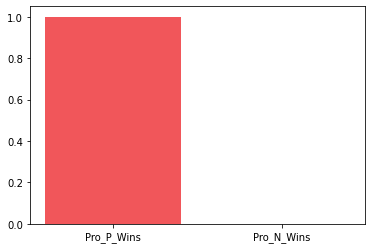

In [37]:
x = np.array(["Pro_P_Wins", "Pro_N_Wins"])
y = np.array([Pro_P_Wins, Pro_N_Wins])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

durchschnitt blue 14.714285714285714
durchschnitt red 14.000000000000002


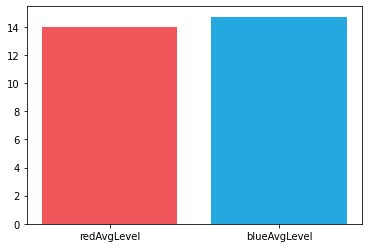

In [38]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueAvgLevel'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueAvgLevel'])
number_of_rows = sub_df_blue.shape[0]
blueAvgLevel = sum_of_kills/number_of_rows
print("durchschnitt blue", blueAvgLevel)
######################## bezüglich red Team ####################
sub_df_red = df[(df['redAvgLevel'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redAvgLevel'])
number_of_rows = sub_df_red.shape[0]
redAvgLevel = sum_of_kills/number_of_rows
print("durchschnitt red", redAvgLevel)
###################### Plotten ###########################
x = np.array(["redAvgLevel", "blueAvgLevel"])
y = np.array([redAvgLevel, blueAvgLevel])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

durchschnitt blue 36.42857142857143
durchschnitt red 30.142857142857142


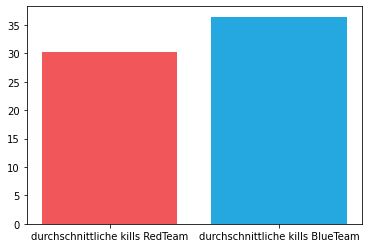

In [39]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueKills'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueKills'])
number_of_rows = sub_df_blue.shape[0]
durchschnitt_BlueTeam = sum_of_kills/number_of_rows
print("durchschnitt blue", durchschnitt_BlueTeam)
####################### bezüglich red team ################
sub_df_red = df[(df['redKills'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redKills'])
number_of_rows = sub_df_red.shape[0]
durchschnitt_RedTeam = sum_of_kills/number_of_rows
print("durchschnitt red", durchschnitt_RedTeam)
###################### Plotten ###########################
x = np.array(["durchschnittliche kills RedTeam", "durchschnittliche kills BlueTeam"])
y = np.array([durchschnitt_RedTeam, durchschnitt_BlueTeam])
plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()


Das eigene Team ist mit 7 kills besser als das Rote Team, denn ein Ace(5 kills) ist notwendig das spiel zu gewinnen, wobei die 2 verbleibenden Kills Catches (Ein bis drei Mitglieder des gegnerischen Teams zu töten. Meistens sind solche Tötungen möglich gewesen wenn das der Gegner am falschen Ort/Zeitpunkt ist, und einfach zu töten ist) sein können, die vor dem Erzielen des Ace's stattgefunden hat.

durchschnitt blue 43.42857142857143
durchschnitt red 35.285714285714285


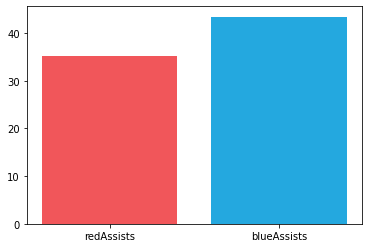

In [40]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueAssists'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueAssists'])
number_of_rows = sub_df_blue.shape[0]
durchschnitt_BlueTeam = sum_of_kills/number_of_rows
print("durchschnitt blue", durchschnitt_BlueTeam)
####################### bezüglich red team ################
sub_df_red = df[(df['redAssists'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redAssists'])
number_of_rows = sub_df_red.shape[0]
durchschnitt_RedTeam = sum_of_kills/number_of_rows
print("durchschnitt red", durchschnitt_RedTeam)
###################### Plotten ###########################
x = np.array(["redAssists", "blueAssists"])
y = np.array([durchschnitt_RedTeam, durchschnitt_BlueTeam])
plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

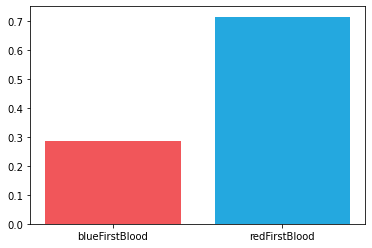

In [41]:
AnzBlueTeamWins = sum(df['blueWins'] == 1) # number of blue Team wins
P_blueGoldDiff = sum((df['blueFirstBlood'] > 0) & (df['blueWins'] == 1))  # Positive blueGoldDiff
Pro_P_Wins = P_blueGoldDiff/AnzBlueTeamWins  # precentage of games where Blue Team wins with positive gold difference
N_blueGoldDiff = sum((df['redFirstBlood'] > 0) & (df['blueWins'] == 1))  # Negative blueGoldDiff
Pro_N_Wins = N_blueGoldDiff/AnzBlueTeamWins  # precentage of games where Blue Team wins with negative
x = np.array(["blueFirstBlood", "redFirstBlood"])
y = np.array([Pro_N_Wins, Pro_P_Wins])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()